(MPRIMALDUALBARRERALOG)=

# 4.5 Método primal-dual de barrera logarítmica (BL)

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion_2 -p 8888:8888 -p 8787:8787 -d palmoreck/jupyterlab_optimizacion_2:3.0.0`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion_2`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion_2:3.0.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion_2).

```

---

Nota generada a partir de [liga1](https://drive.google.com/file/d/16-_PvWNaO0Zc9x04-SRsxCRdn5fxebf2/view), [liga2](https://drive.google.com/file/d/1oulU1QAKyLyYrkpJBLSPlbWnKFCWpllX/view), [liga3](https://drive.google.com/file/d/1RMwUXEN_SOHKue-J9Cx3Ldvj9bejLjiM/view)

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* 

```

El método primal-dual de barrera logarítmica (BL) es un método iterativo que realiza un manejo de las variables primales y duales del problema de optimización a resolver. Se le clasifica como un método por puntos interiores.

```{sidebar} Un poco de historia ...

El [método símplex](https://en.wikipedia.org/wiki/Simplex_algorithm) desarrollado por Dantzig en los $40$'s hizo posible que se formularan y analizaran modelos grandes en una forma sistemática y eficiente. Hoy en día continúa siendo uno de los métodos más utilizados para resolver programas lineales. No obstante puede ser ineficiente en problemas lineales "patológicos" (ver [Klee-Minty cube](https://en.wikipedia.org/wiki/Klee%E2%80%93Minty_cube)) pues el tiempo para resolver tales problemas es exponencial respecto al tamaño del problema (medido como el número de variables y la cantidad de almacenamiento para los datos del problema). Para la mayoría de problemas prácticos el método símplex es mucho más eficiente que estos casos "patológicos" pero esto motivó la investigación y desarrollo de nuevos algoritmos con mejor desempeño. En 1984 Karmarkar publicó el [algoritmo](https://en.wikipedia.org/wiki/Karmarkar%27s_algorithm) que lleva su mismo nombre que tiene una complejidad polinomial y en la práctica resultó ser eficiente. Pertenece a la clase de métodos con el nombre de [puntos interiores](https://en.wikipedia.org/wiki/Interior-point_method). Hay diferentes tipos de métodos por puntos interiores siendo los de la clase primal-dual ampliamente usados en la práctica. 

```

## Métodos por puntos interiores (PI)

Los métodos por puntos interiores (PI) son esquemas iterativos que en un inicio se utilizaron para resolver PL's, sin embargo, se ha extendido su uso al caso no lineal. Por ejemplo, distintos tipos de métodos por PI han sido usados para resolver problemas de optimización convexos, ver {ref}`problemas de optimización convexa en su forma estándar o canónica <PROBOPTCONVEST>`.

```{margin}

Recuérdese que nombramos problemas de optimización con restricciones *large scale* a aquellos problemas de optimización que tienen un número de variables y restricciones mayor o igual a $10^5$ (ambas).

```

En cada iteración de los métodos PI las restricciones de desigualdad del problema de optimización se satisfacen de forma estricta. Cada iteración es costosa de calcular y realiza avance significativo a la solución en contraste con el método símplex que requiere un gran número de iteraciones no costosas. Una característica que tienen los métodos PI es que los problemas *large scale* no requieren muchas más iteraciones que los problemas *small scale* a diferencia del método símplex. Sin embargo para problemas *small scale* en general realizan más iteraciones que el método símplex.

En cada iteración el método símplex se mueve de la solución FEV actual a una solución FEV adyacente por una arista de la frontera de la región factible, ver {ref}`método símplex <METODOSIMPLEX>`. Los problemas del tipo *large scale* tienen una cantidad enorme de soluciones FEV. Para ver esto piénsese en un PL al que se le van añadiendo restricciones funcionales. Entonces se añadirán aristas y por tanto soluciones FEV.  Los métodos PI evitan tal comportamiento pues avanzan por el interior de la región factible hacia los puntos óptimos y tiene muy poco efecto el ir añadiedo restricciones funcionales al PL para el desempeño de los métodos PI.

```{admonition} Observación
:class: tip

Los métodos PI han mostrado "buena" eficiencia (en términos del número de iteraciones realizadas) en resolver problemas de optimización *large scale*. Además son métodos que pueden implementarse para procesamiento con cómputo en paralelo.


```

Los métodos PI conforme avanzan en las interaciones aproximan a los puntos óptimos en el límite. Por ejemplo, para el {ref}`ejemplo prototipo <EJPROTOTIPO>` de un programa lineal (PL) a continuación se presenta una trayectoria obtenida por un método PI que se aproxima a la solución óptima $(2, 6)$:

$$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

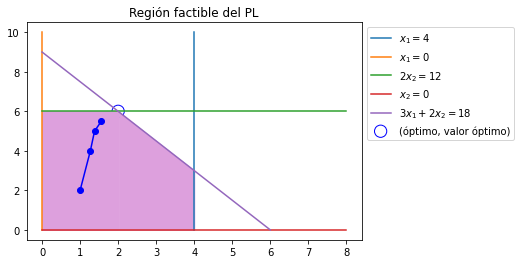

In [2]:
#x_1 ≤ 4

point1_x_1 = (4,0)

point2_x_1 = (4, 10)

point1_point2_x_1 = np.row_stack((point1_x_1, point2_x_1))

#x_1 ≥ 0
point3_x_1 = (0,0)

point4_x_1 = (0, 10)

point3_point4_x_1 = np.row_stack((point3_x_1, point4_x_1))

#2x_2 ≤ 12 or x_2 ≤ 6

point1_x_2 = (0, 6)

point2_x_2 = (8, 6)

point1_point2_x_2 = np.row_stack((point1_x_2, point2_x_2))

#x_2 ≥ 0

point3_x_2 = (0, 0)

point4_x_2 = (8, 0)

point3_point4_x_2 = np.row_stack((point3_x_2, point4_x_2))

#3x_1 + 2x_2 ≤ 18

x_1_region_1 = np.linspace(0,4, 100)

x_2_region_1 = 1/2*(18 - 3*x_1_region_1)


x_1 = np.linspace(0,6, 100)

x_2 = 1/2*(18 - 3*x_1)

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2)

optimal_point = (2, 6)

plt.scatter(optimal_point[0], optimal_point[1], marker='o', s=150,
            facecolors="none", edgecolors='b')

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$", "(óptimo, valor óptimo)"], bbox_to_anchor=(1, 1))

point_1_interior_points = (1, 2)
point_2_interior_points = (1.27, 4)
point_3_interior_points = (1.38, 5)
point_4_interior_points = (1.56, 5.5)

points_interior_points = np.row_stack((point_1_interior_points,
                                       point_2_interior_points,
                                       point_3_interior_points,
                                       point_4_interior_points))

plt.plot(points_interior_points[:, 0], points_interior_points[:, 1], 
         marker='o', color="blue"
         )

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
x_1_region_2 = np.linspace(0,2, 100)
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("Región factible del PL")
plt.show()


```{margin}

Recuérdese que los parámetros de un PL son $b_i, c_i, a_{ij}$.

```

Aunque los métodos PI son una buena alternativa para resolver PL's perdemos ventajas que tiene el método símplex como es el análisis de sensibilidad y el análisis posterior que puede realizarse al modificar los parámetros del PL. Ver las referencias al final de la nota para tales análisis.

## Método primal-dual

Se describirán dos ideas que se utilizan en los métodos primal dual y posteriormente una tercera idea que utiliza la función de barrera logarítmica (FBL). Para esto, considérese la forma estándar de un PL (PLE):

$$
\displaystyle \min_{x \in \mathbb{R}^n} c^Tx\\
\text{sujeto a:} \\
Ax=b\\
x \geq 0
$$

donde: $A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^m$, $m < n$ con *rank* completo por renglones y las restricciones se interpretan de una forma *pointwise*.

```{margin}

Las restricciones $Ax = b$ se pueden escribir con funciones $h: \mathbb{R}^n \rightarrow \mathbb{R}$ , $h_i(x) = b_i-a_i ^Tx$, $a_i$ $i$-ésimo renglón de $A \in \mathbb{R}^{m \times n}$ y $b_i$ $i$-ésima entrada de $b$ para $i=1, \cdots, m$

```

La función Lagrangiana del problema anterior es:

$$\mathcal{L}(x, \lambda, \nu) = f_o(x) + \displaystyle \sum_{i=1}^n \lambda_i f_i(x) + \sum_{i=1}^m \nu_i h_i(x) = c^Tx + \lambda^T(-x)  + \nu^T(b-Ax)$$

donde: $\mathcal{L}: \mathbb{R}^n \times \mathbb{R}^n \times \mathbb{R}^m \rightarrow \mathbb{R}$.

El problema dual asociado es:

```{margin}

El problema primal es: 

$\displaystyle \min_{x \in \mathbb{R}^n} c^Tx \\
\text{sujeto a:}\\
Ax = b \\
x \geq 0
$

$A \in \mathbb{R}^{m \times n}$ y *rank* de A igual a $m < n$.

```

$$\displaystyle \max_{\nu \in \mathbb{R}^m, \lambda \in \mathbb{R}^n} b^T \nu \\
\text{sujeto a :} \\
c - A^T \nu - \lambda = 0 \\
\lambda \geq 0
$$

Las condiciones KKT son:

```{margin}

Ver {ref}`las condiciones KKT para un PL en su forma estándar<CONDKKTPLESTANDAR>`.

```

$$
\begin{eqnarray}
\nabla_x \mathcal{L}(x, \lambda, \nu) &=& c - A^T\nu - \lambda = 0 \nonumber \\
\lambda^Tx &=& 0 \nonumber \\
Ax &=& b \nonumber \\
-x &\leq& 0 \nonumber \\
\lambda &\geq& 0
\end{eqnarray}
$$

Los métodos de la clase primal-dual encuentran soluciones $(x^*, \lambda^*, \nu^*)$ para las igualdades anteriores y modifican las direcciones de búsqueda y tamaños de paso para que las desigualdades se satisfagan de forma **estricta** en cada iteración.

En los métodos de la clase primal-dual reescribimos las condiciones KKT de optimalidad anteriores mediante una función $F: \mathbb{R}^{2n + m} \rightarrow \mathbb{R}^{2n+m}$ dada por:

$$F(x, \lambda, \nu ) = \left [ \begin{array}{c} A^T \nu + \lambda -c \\ X \Lambda e \\  b - Ax \end{array} \right ]$$


y resolvemos la ecuación **no lineal** $F(x, \lambda, \nu )=0$ para $(x, \lambda) \geq 0$, donde: $X = \text{diag}(x_1, \dots, x_n)$, $\Lambda = \text{diag}(\lambda_1, \dots, \lambda_n)$ y $e$ es un vector de $1$'s en $\mathbb{R}^n$. Además en cada iteración se cumple $x^{(k)} > 0$ y $\lambda^{(k)} > 0$ para $(x^{(k)}, \lambda^{(k)}, \nu^{(k)})$, por esto tales métodos son considerados como puntos interiores. 

Como la mayoría de los métodos iterativos en optimización, los métodos primal-dual tienen un procedimiento para determinar la dirección de búsqueda y una cantidad que debe ser monitoreada cuyo valor alcance un valor objetivo. En el caso de los PLE's tal cantidad es la *duality gap* medida como: $\lambda^Tx$, ver {ref}`brecha dual <BRECHADUAL>`.  

(PRIMIDEAMETPRIMDUAL)=

### Primera idea: determinar la dirección de búsqueda

```{margin}

Sistema de ecuaciones no lineales a resolver: 

$F(x, \lambda, \nu ) = \left [ \begin{array}{c} A^T \nu + \lambda -c \\ X \Lambda e \\ b - Ax \end{array} \right ] = 0$

```

La dirección de búsqueda se determina aplicando el método de Newton al sistema de ecuaciones no lineales que se muestra en el margen del PLE. Por tanto, se resuelve el sistema de ecuaciones lineales:

$$J_F(x, \lambda, \nu) \left [ \begin{array}{c} \Delta x \\ \Delta \lambda \\ \Delta \nu \end{array} \right ] = - F(x, \lambda, \nu)$$

donde: $J_F$ es la Jacobiana de $F$ cuya expresión es:

$$J_F(x, \lambda, \nu) = \left [ \begin{array}{ccc} 0 & I & A^T \\ \Lambda & X & 0 \\ A & 0 & 0 \end{array} \right ].$$

para el vector de incógnitas $\left [ \begin{array}{c} \Delta x \\ \Delta \lambda \\ \Delta \nu \end{array} \right ]$. 

Una vez calculado tal vector de incógnitas se realiza la actualización:

$$\left [ \begin{array}{c} x \\ \lambda \\ \nu \end{array} \right ]^{(k+1)} = \left [ \begin{array}{c} x \\ \lambda \\ \nu \end{array} \right ]^{(k)} + \left [ \begin{array}{c} \Delta x \\ \Delta \lambda \\ \Delta \nu \end{array} \right ]$$

donde: $k$ hace referencia a la $k$-ésima iteración.

Ver {ref}`Sistema de ecuaciones no lineales<SISTECNOLINEALES>`.

```{admonition} Observación
:class: tip

Si bien podría elegirse otra dirección de búsqueda, la dirección de Newton (o variantes de ésta) se prefiere por sus propiedades de convergencia e invarianza ante transformaciones afín.

```

Si denotamos $r_d = A^T \nu + \lambda -c, r_p = b - Ax$ como el residual para factibilidad dual y residual para factibilidad primal respectivamente entonces el sistema de ecuaciones lineales a resolver es:

$$\left [ \begin{array}{ccc} 0 & I & A^T \\ \Lambda & X & 0 \\ A & 0 & 0 \end{array} \right ]  \left [ \begin{array}{c} \Delta x \\ \Delta \lambda \\ \Delta \nu \end{array} \right ] =  - \left [ \begin{array}{c} r_d \\ X \Lambda e \\ r_p \end{array} \right ]$$

```{admonition} Comentario

El sistema de ecuaciones lineales anterior para problemas *large scale* no se construye pues es un sistema cuadrado de tamaño $2n + m \times 2n + m$ y se resuelve reduciéndolo a sistemas de ecuaciones equivalentes. Representa el paso más costoso del método primal-dual.

```

(SEGUNIDEAPRIMDUAL)=

### Segunda idea: cortar el paso

Si se toma un paso completo es muy posible que en la siguiente iteración se encuentre muy cerca de alguna de las fronteras de restricción o bien se salga de la región factible. Para esto se define un parámetro $t^{(k)} \in (0, 1]$ y por tanto la actualización es:

$$\left [ \begin{array}{c} x \\ \lambda \\ \nu \end{array} \right ]^{(k+1)} = \left [ \begin{array}{c} x \\ \lambda \\ \nu \end{array} \right ]^{(k)} + t^{(k)}  \left [ \begin{array}{c} \Delta x \\ \Delta \lambda \\ \Delta \nu \end{array} \right ]$$

donde: $k$ hace referencia a la $k$-ésima iteración.

```{admonition} Comentario

El parámetro $t^{(k)}$ se calcula con metodologías como búsqueda de línea o regiones de confianza, ver [line search](https://en.wikipedia.org/wiki/Line_search), {ref}`método de búsqueda de línea por backtracking <MBUSLINBACK>`, [trust region](https://en.wikipedia.org/wiki/Trust_region).

```

## Método primal-dual de barrera logarítmica (BL)

### Tercera idea: reducir la *duality gap* y centrar. Uso de la función de barrera logarítmica (FBL)

En cada iteración los métodos primal-dual buscan reducir la *duality gap* o bien mantenerse "cerca" de la trayectoria nombrada trayectoria central.

```{margin}

Sistema de ecuaciones lineales $\left [ \begin{array}{ccc} 0 & I & A^T \\ \Lambda & X & 0 \\ A & 0 & 0 \end{array} \right ]  \left [ \begin{array}{c} \Delta x \\ \Delta \lambda \\ \Delta \nu \end{array} \right ] =  - \left [ \begin{array}{c} r_d \\ X \Lambda e \\ r_p \end{array} \right ]$

```

```{admonition} Comentario

Recuérdese que la *duality gap* en un PLE para el par $(x, \nu)$ primal-dual factible está dada por la diferencia: $c^Tx - b^T \nu$. La *duality gap* en un PLE es igual a $\lambda^Tx$. En el sistema de ecuaciones lineales que se muestra en el margen se representa cada sumando de $\lambda^Tx$ con el producto $X \Lambda e$ (recuérdese $X, \Lambda$ son matrices diagonales).

```

La trayectoria central se define a partir de la FBL, ver [Barrier function](https://en.wikipedia.org/wiki/Barrier_function). La definición siguiente se da para un POCE de forma general.

```{margin}

Las restricciones $Ax = b$ se pueden escribir con funciones $h: \mathbb{R}^n \rightarrow \mathbb{R}$ , $h_i(x) = b_i-a_i ^Tx$, $a_i$ $i$-ésimo renglón de $A \in \mathbb{R}^{p \times n}$ y $b_i$ $i$-ésima entrada de $b$ para $i=1, \cdots, p$

```

```{admonition} Definición

Considérese el problema de optimización convexa en la forma estándar (POCE):

$$
\begin{eqnarray}
\displaystyle \min_{x \in \mathbb{R}^n} &f_o(x)& \nonumber \\
&\text{sujeto a:}& \nonumber\\
f_i(x) &\leq& 0  \quad i=1,\dots,m \nonumber \\
Ax &=& b
\end{eqnarray}
$$ 

con $A \in \mathbb{R}^{p \times n}$ y *rank* de $A$ igual a $p < n$.

Se define la función de barrera logarítmica (FBL) como:

$$\phi(x) =-\displaystyle \sum_{i=1}^m \log(-f_i(x))$$

```

```{sidebar} Un poco de historia ...

La metodología para resolver el problema de barrera logarítmica (PBL) está fundamentada en la *sequential unconstrained minimization technique (SUMT)*, [A. V. Fiacco, G. P. McCormick, 1965](https://www.jstor.org/stable/168637?seq=1). Es una técnica para resolver problemas no lineales sin restricciones que genera una secuencia de puntos interiores factibles que convergen a la solución del problema. Se eligen funciones de barrera con propiedades como la convexidad. Hay versiones de la SUMT para puntos exteriores que inician con puntos no factibles y vía la penalización se busca la convergencia hacia la región factible. En cada iteración de SUMT se define un valor del parámetro de barrera y se resuelve un problema de optimización más sencillo que el original con el método de Newton. La solución de tal problema se utiliza para definir puntos iniciales del siguiente problema a resolver con un valor del parámetro de barrera diferente. A medida que se avanza en las iteraciones la función objetivo del PBL se aproxima cada vez más a $f_o$, al valor óptimo y al conjunto óptimo. 


```

El POCE se resuelve planteando el siguiente problema:

$$
\displaystyle \min_{x \in \mathbb{R}^n} f_B(x|t_B) \\
\text{sujeto a:} \\
Ax = b
$$

donde: $f_B(x|t_B) = f_o(x) + \frac{1}{t_B} \phi(x) = f_o(x) -  \frac{1}{t_B} \displaystyle \sum_{i=1}^m \log(-f_i(x))$ con $t_B$ un parámetro positivo que nombramos **parámetro de barrera**. Denotamos a este problema como **problema de barrera logarítmica (PBL)**.

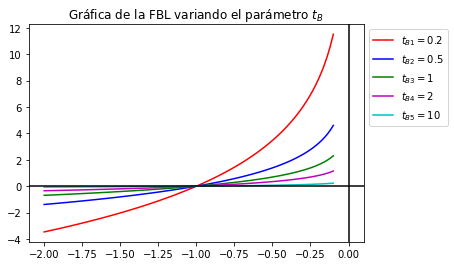

In [3]:
x = np.linspace(-2, -.1, 100)
log_barrier = -np.log(-x)
t_B1 = 0.2
t_B2 = 0.5
t_B3 = 1
t_B4 = 2
t_B5 = 10
plt.plot(x, 1/t_B1*log_barrier, "r",
         x, 1/t_B2*log_barrier, "b",
         x, 1/t_B3*log_barrier, "g",
         x, 1/t_B4*log_barrier, "m",
         x, 1/t_B5*log_barrier, "c")
plt.legend(["$t_{B1}=0.2$",
            "$t_{B2}=0.5$",
            "$t_{B3}=1$",
            "$t_{B4}=2$",
            "$t_{B5}=10$"], bbox_to_anchor=(1,1))
plt.axhline(color="black")
plt.axvline(color="black")
plt.title("Gráfica de la FBL variando el parámetro $t_B$")
plt.show()

Valores más grandes de $t_B$ hacen que $f_B(x|t_B)$ tienda a $f_o(x)$. Como se observa en la gráfica anterior al elegir un valor de $t_B$ cada vez más grande se tiene: $f_B(x|t_B) = f_o(x) + \frac{1}{t_B} \phi(x) \approx f_o(x)$. 

```{margin}

El POCE recuérdese es:

$
\begin{eqnarray}
\displaystyle \min_{x \in \mathbb{R}^n} &f_o(x)& \nonumber \\
&\text{sujeto a:}& \nonumber\\
f_i(x) &\leq& 0  \quad i=1,\dots,m \nonumber \\
Ax &=& b
\end{eqnarray}
$ 

y el PBL es:

$
\displaystyle \min_{x \in \mathbb{R}^n} f_B(x|t_B) \\
\text{sujeto a:} \\
Ax = b
$

con $A \in \mathbb{R}^{p \times n}$ y *rank* de $A$ igual a $p < n$, 

$\begin{eqnarray}
f_B(x|t_B) &=& f_o(x) + \frac{1}{t_B} \phi(x) \nonumber \\
&=& f_o(x) -  \frac{1}{t_B} \displaystyle \sum_{i=1}^m \log(-f_i(x))
\end{eqnarray}
$.


```

```{admonition} Comentarios


* La función $f(x) = -\frac{1}{t_B} \log(-x)$ para $x < 0$ es convexa, diferenciable y aproxima a la función indicadora:

$$I(x) = \begin{cases} \infty \text{ si } x > 0 \\ 0 \text{ si } x \leq 0 \end{cases}$$


la cual es una función discontinua:

<img src="https://dl.dropboxusercontent.com/s/i4t3j8c9amzue1n/indicator_func.png?dl=0" heigth="250" width="250">

En el dibujo anterior sólo se visualiza para el eje horizontal el intervalo $(-\infty, 0)$.


* La función indicadora del punto anterior ayuda a reescribir el POCE como:

$$\displaystyle \min_{x \in \mathbb{R}^n} f_o(x) + \displaystyle \sum_{i=1}^m I(f_i(x))$$

$$\text{sujeto a:}$$

$$Ax = b$$

por esto resolver el PBL es equivalente a resolver el POCE para valores más grandes de $t_B$.

* La FBL es un caso particular de funciones de barrera que penalizan al no satisfacer las restricciones de desigualdad, ver [Penalty method](https://en.wikipedia.org/wiki/Penalty_method).

* En general las funciones de barrera deben tener las siguientes propiedades para $x$ primal factibles:

1. Tener valores "pequeños" si $x$ está "lejos" de la frontera de la región factible.

2. Tener valores "grandes" si $x$ está "cerca" de la frontera de la región factible.

3. Tener propiedades como convexidad o diferenciabilidad (ventajas al tener tales propiedades).

Por lo anterior las funciones de barrera evitan que se cruce o llegue a la frontera de la región factible del problema primal.


* Otra función de barrera para un PL es: $\phi(x) = -\displaystyle \sum_{i=1}^m \frac{1}{f_i(x)}$ para $x$ factibles.

* Los problemas de optimización convexos con únicamente restricciones de igualdad pueden resolverse aplicando extensiones del método de Newton.


```

### Trayectoria central determinada por los puntos centrales

```{margin}

El PBL para un POCE recuérdese es:

$
\displaystyle \min_{x \in \mathbb{R}^n} f_B(x|t_B) \\
\text{sujeto a:} \\
Ax = b
$

con $A \in \mathbb{R}^{p \times n}$ y *rank* de $A$ igual a $p < n$, 

$\begin{eqnarray}
f_B(x|t_B) &=& f_o(x) + \frac{1}{t_B} \phi(x) \nonumber \\
&=& f_o(x) -  \frac{1}{t_B} \displaystyle \sum_{i=1}^m \log(-f_i(x))
\end{eqnarray}
$.

```

```{admonition} Definición

Para cada valor del parámetro de barrera $t_B$, se definen los **puntos centrales** $x^*(t_B)$ como la solución del PBL y el conjunto de puntos centrales se le nombra trayectoria central, *central path*.

```

Revisemos las condiciones KKT de optimalidad que deben cumplir los puntos centrales para un PLE:


$$
\displaystyle \min_{x \in \mathbb{R}^n} c^Tx\\
\text{sujeto a:} \\
Ax=b\\
x \geq 0
$$

con $A \in \mathbb{R}^{m \times n}$ y *rank* de $A$ igual a $m < n$.

Se tiene:


```{margin}

Recuérdese que en un PLE $f_i(x) = - x_i \forall i=1, \cdots, n$.

```


$$
\begin{eqnarray}
\phi(x) &=& -\displaystyle \sum_{i=1}^n \log(-f_i(x)) \nonumber \\
&=& - \sum_{i=1}^n \log(x_i)
\end{eqnarray}
$$


y por tanto el PBL para el PLE (PBL-PLE) es:

$$\displaystyle \min_{x \in \mathbb{R}^n} c^Tx - \frac{1}{t_B} \displaystyle \sum_{i=1}^n \log(x_i)$$

$$\text{sujeto a:}$$

$$Ax=b$$


La función Lagrangiana del PBL-PLE es:


$$
\begin{eqnarray}
\mathcal{L}_B(x, \nu) &=& f_B(x|t_B) + \sum_{i=1}^m \nu_i h_i(x) \nonumber \\
&=& c^Tx - \frac{1}{t_B} \displaystyle \sum_{i=1}^n \log(x_i)  + \sum_{i=1}^m \nu_i(b_i-a_i ^Tx) \nonumber \\
&=& c^Tx - \frac{1}{t_B} \displaystyle \sum_{i=1}^n \log(x_i)  + \nu^T(b-Ax) \nonumber
\end{eqnarray}
$$

con $a_i$ $i$-ésimo renglón de $A$ y $b_i$ $i$-ésima entrada de $b$. Las condiciones necesarias y suficientes KKT de optimalidad del PBL-PLE son:

```{margin}

Recuérdese que las condiciones de KKT para un PLE son:

$
\begin{eqnarray}
\nabla_x \mathcal{L}(x, \lambda, \nu) &=& c - A^T\nu - \lambda = 0 \nonumber \\
\lambda^Tx &=& 0 \nonumber \\
Ax &=& b \nonumber \\
-x &\leq& 0 \nonumber \\
\lambda &\geq& 0
\end{eqnarray}
$

```

$$
\begin{eqnarray}
\nabla_x \mathcal{L}_B(x, \nu) &=& c - A^T\nu - \frac{1}{t_B}d = 0 \nonumber \\
Ax &=& b \nonumber \\
\end{eqnarray}
$$

donde: $d = X^{-1}e = \left [ \begin{array}{c} \frac{1}{x_1} \\ \vdots \\ \frac{1}{x_n} \\ \end{array} \right ]$. Ver {ref}`condiciones KKT para un PL en su forma estándar <CONDKKTPLESTANDAR>` (se muestran en el margen).

Los puntos centrales $x^*(t_B)$ resuelven el PBL-PLE y por tanto satisfacen:

$$
\begin{eqnarray}
\nabla_x \mathcal{L}_B(x^*(t_B), \nu) &=& c - A^T\nu - \frac{1}{t_B} d(t_B) = 0 \nonumber \\
Ax^*(t_B) &=& b \nonumber \\
\end{eqnarray}
$$

donde: $d(t_B) = X^{*-1}(t)e = \left [ \begin{array}{c} \frac{1}{x_1^*(t_B)} \\ \vdots \\ \frac{1}{x_n^*(t_B)} \\ \end{array} \right ]$.

### Relación entre las condiciones KKT de optimalidad del PLE y las del PBL-PLE

Para establecer la relación entre las condiciones KKT de optimalidad del PLE y las del PBL-PLE considérese **sólo** en esta sección que el PBL-PLE es:

$$\displaystyle \min_{x \in \mathbb{R}^n} t_B c^Tx - \displaystyle \sum_{i=1}^n \log(x_i)$$

$$\text{sujeto a:}$$

$$Ax=b$$


```{margin}

La FBL en el PBL-PLE recuérdese es:

$
\begin{eqnarray}
\phi(x) &=& -\displaystyle \sum_{i=1}^n \log(-f_i(x)) \nonumber \\
&=& - \sum_{i=1}^n \log(x_i)
\end{eqnarray}
$

```

```{admonition} Observación
:class: tip

Esta forma del PBL-PLE es equivalente a la revisada anteriormente en la que la FBL se divide por el parámetro $t_B$. Es una cuestión sólo de escritura matemática lo que se realiza a continuación.

```

Las condiciones KKT son iguales a las revisadas en la sección anterior salvo la posición en la que se tiene el parámetro $t_B$:


$$
\begin{eqnarray}
\nabla_x \mathcal{L}_B(x^*(t_B), \hat{\nu}) &=& t_Bc - A^T\hat{\nu} - d(t_B) = 0 \nonumber \\
Ax^*(t_B) &=& b \nonumber \\
\end{eqnarray}
$$

donde: $\hat{\nu} = t_B \nu$.

```{margin}

Recuérdese que las condiciones de KKT para un PLE son:

$
\begin{eqnarray}
\nabla_x \mathcal{L}(x, \lambda, \nu) &=& c - A^T\nu - \lambda = 0 \nonumber \\
\lambda^Tx &=& 0 \nonumber \\
Ax &=& b \nonumber \\
-x &\leq& 0 \nonumber \\
\lambda &\geq& 0
\end{eqnarray}
$

```

Las condiciones KKT para un PLE se muestran en el margen y obsérvese que si $\lambda^*(t_B) = - \frac{1}{t_B f_i(x^*(t_B))} = - \frac{1}{t_B (-x_i^*(t_B))}$ con $x_i^*(t_B)$ $i$-ésima componente de $x^*(t_B)$ $\forall i = 1, \dots, n$ entonces se cumple:

$$\lambda^*(t_B) > 0$$

pues por la definición de la FBL en el PBL-PLE debe cumplirse: $f_i(x)  = -x_i < 0$ o bien para los puntos centrales $-x_i^*(t_B) < 0 \forall i=1, \dots, n$. Lo anterior resulta del dominio de la función $\log$ la cual está definida únicamente en $\mathbb{R}_{++}$ (reales positivos). Esto satisface las desigualdades de factibilidad primal y de factibilidad dual de las condiciones KKT de optimalidad.

La holgura complementaria de las condiciones KKT de optimalidad para un PLE en términos de los puntos centrales es:

$$
\begin{eqnarray}
\lambda^*(t_B)^Tx^*(t_B) &=& \displaystyle \sum_{i=1}^n \lambda_i^*(t_B) x_i^*(t_B) \nonumber \\
&=& \displaystyle \sum_{i=1}^n - \frac{x_i^*(t_B)}{t_B (-x_i^*(t_B))} \nonumber \\
&=& \displaystyle \sum_{i=1}^n \frac{1}{t_B} = \frac{n}{t_B}
\end{eqnarray}
$$

```{margin}

El POCE recuérdese es:

$
\begin{eqnarray}
\displaystyle \min_{x \in \mathbb{R}^n} &f_o(x)& \nonumber \\
&\text{sujeto a:}& \nonumber\\
f_i(x) &\leq& 0  \quad i=1,\dots,m \nonumber \\
Ax &=& b
\end{eqnarray}
$ 

y el PBL es:

$
\displaystyle \min_{x \in \mathbb{R}^n} f_B(x|t_B) \\
\text{sujeto a:} \\
Ax = b
$

con $A \in \mathbb{R}^{p \times n}$ y *rank* de $A$ igual a $p < n$,

$\begin{eqnarray}
f_B(x|t_B) &=& f_o(x) + \frac{1}{t_B} \phi(x) \nonumber \\
&=& f_o(x) -  \frac{1}{t_B} \displaystyle \sum_{i=1}^m \log(-f_i(x))
\end{eqnarray}
$.


```

Por tanto la *duality gap* asociada con $x^*(t_B), \lambda^*(t_B), \nu^*(t_B)$ es: $\frac{n}{t_B}$ donde: $\nu^*(t_B) = \frac{\hat{\nu}}{t_B}$.

```{admonition} Comentarios

* Por la forma de la *duality gap* anterior para los puntos centrales si $t_B$ se incrementa entonces la *duality gap* tiende a cero en el método primal dual de BL.

* Para un PBL que se obtiene de un POCE la *duality gap* anterior para los puntos centrales es $\frac{m}{t_B}$ pues se tienen $m$ funciones $f_i$ de desigualdad.


```

### ¿Cómo calcular los puntos centrales?

Para calcular los puntos centrales del PBL-PLE se utiliza la {ref}`primera idea: determinar la dirección de búsqueda <PRIMIDEAMETPRIMDUAL>` en la que se resuelve el siguiente sistema de ecuaciones no lineales con el método de Newton:


```{margin}

El PBL-PLE recuérdese es:

$
\displaystyle \min_{x \in \mathbb{R}^n} c^Tx - \frac{1}{t_B} \displaystyle \sum_{i=1}^n \log(x_i) \nonumber \\
\text{sujeto a:} \nonumber \\
Ax=b
$

con $A \in \mathbb{R}^{m \times n}$ y *rank* de $A$ igual a $m < n$. Las condiciones KKT son:

$
\begin{eqnarray}
\nabla_x \mathcal{L}_B(x, \nu) &=& c - A^T\nu - \frac{1}{t_B}d = 0 \nonumber \\
Ax &=& b \nonumber \\
\end{eqnarray}
$

donde: $d = X^{-1}e = \left [ \begin{array}{c} \frac{1}{x_1} \\ \vdots \\ \frac{1}{x_n} \\ \end{array} \right ]$. 

```

$$F(x, \nu) = \left [ \begin{array}{c} c - A^T\nu - \frac{1}{t_B}d(t_B) \\ b- Ax(t_B) \end{array} \right ] = 0$$


donde: $d(t_B) = X^{*-1}(t)e = \left [ \begin{array}{c} \frac{1}{x_1^*(t_B)} \\ \vdots \\ \frac{1}{x_n^*(t_B)} \\ \end{array} \right ]$. 


```{admonition} Observación
:class: tip

Obsérvese que se están utilizando las condiciones KKT de optimalidad del PBL-PLE que se muestran en el margen pero perturbadas.

```

Este sistema de ecuaciones no lineales conduce a resolver el sistema de ecuaciones lineales:


$$J_F(x, \nu) \left [ \begin{array}{c} \Delta x \\ \Delta \nu \end{array} \right ] = - F(x, \nu)$$

donde: $J_F(x, \nu) = \left [ \begin{array}{cc} \nabla_{xx} ^2 \mathcal{L}_B(x, \nu)  &  \nabla_{\nu x} \mathcal{L}_B(x,\nu) \\ -A & 0\end{array} \right ] = \left [ \begin{array}{cc} \frac{1}{t_B} D^2(t_B) &  -A^T \\ -A & 0\end{array} \right ]$ y $D^2(t_B) = \text{diag}^2(d(t_B)) \in \mathbb{R}^{n \times n}$. 

La actualización en el método de Newton es:

$$\left [ \begin{array}{c} x \\ \nu \end{array} \right ]^{(k+1)} = \left [ \begin{array}{c} x \\ \nu \end{array} \right ]^{(k)} + t^{(k)}  \left [ \begin{array}{c} \Delta x \\ \Delta \nu \end{array} \right ]$$

donde se utilizó la {ref}`segunda idea: cortar el paso <SEGUNIDEAPRIMDUAL>`.

```{admonition} Comentarios

* Se pueden eliminar los signos negativos que están en los bloques de la matriz del sistema de ecuaciones lineales anterior que contienen $A, A^T$ pero por consistencia con lo desarrollado en la nota de dualidad para un PL se mantienen los signos negativos (si se eliminan también debe de ajustarse el lado derecho del sistema). Esta modificación se relaciona con la definición de la función Lagrangiana.

* También una modificación que se realiza para que en el primer bloque del sistema de ecuaciones lineales anterior no tengamos del lado izquierdo y del lado derecho $\frac{1}{t_B}$ se puede trabajar con el problema de optimización equivalente:


$$
\displaystyle \min_{x \in \mathbb{R}^n} f_B(x|t_B) \\
\text{sujeto a:} \\
Ax = b
$$

donde: $f_B(x|t_B) = t_Bf_o(x) + \phi(x) = t_Bf_o(x) - \displaystyle \sum_{i=1}^m \log(-f_i(x))$ con $t_B$ **parámetro de barrera**. 


**Estas dos modificaciones se utilizan para implementar el PBL**.


```

## Método primal-dual de BL aplicado al ejemplo prototipo

In [4]:
def log_barrier_aux_eval_constraints(eval_f_const_inequality):
    """
    Auxiliary function for evaluation of constraint inequalities
    in logarithmic barrier
    """
    #get values that are nonnegative through indexes
    idx_zeros = np.logical_and(eval_f_const_inequality < np.nextafter(0,1),
                               eval_f_const_inequality > -np.nextafter(0,1))
    idx_positive = eval_f_const_inequality > 0 
    idx  = np.logical_or(idx_zeros, idx_positive) 
    #eval constraint inequality functions
    #next line produces warning if a value of constraint 
    #is nonnegative
    eval_f_const_inequality = np.log(-eval_f_const_inequality)                                                           
    #assign large value for values positive or equal to 0
    eval_f_const_inequality[idx] = 1e10     
    return eval_f_const_inequality
def constraint_inequalities_funcs_eval(x, 
                                       constraint_inequalities):
    """
    Auxiliary function for the evaluation of constraint inequalities
    in logarithmic barrier function
    """
    const_ineq_funcs_eval = np.array([const(x) for const in \
                                      constraint_inequalities_funcs_generator(constraint_inequalities)])
    return const_ineq_funcs_eval
def logarithmic_barrier(f,x, t_B, constraint_inequalities):
    """
    Implementation of Logarithmic barrier function.
    """
    constraint_ineq_funcs_eval = constraint_inequalities_funcs_eval(x,constraint_inequalities)
    log_barrier_const_eval = log_barrier_aux_eval_constraints(constraint_ineq_funcs_eval)
    return t_B*f(x) + np.sum(log_barrier_const_eval)
def constraint_inequalities_funcs_generator(constraint_inequalities):
    """
    Generator for functional form of inequalities.
    For every example this function produces different fuctions.
    """
    for k, v in constraint_inequalities.items():
        yield v
def line_search_for_log_barrier_by_backtracking(f,dir_desc,
                                                x,t_B,
                                                constraint_inequalities,
                                                der_direct, 
                                                alpha=.15, beta=.5):
    """
    Line search that sufficiently decreases f restricted to a 
    ray in the direction dir_desc.
    Args:
        alpha (float): parameter in line search with backtracking, 
                       tipically .15
        beta (float): parameter in line search with backtracking, 
                      tipically .5
        f (lambda expression): definition of function f.
        dir_desc (array): descent direction.
        x (array): numpy array that holds values where line search 
                   will be performed.
        der_direct (float): directional derivative of f.
    Returns:
        t (float): positive number for stepsize along dir_desc that 
                   sufficiently decreases f.
    """
    t = 1
    if alpha > 1/2:
        print('alpha must be less than or equal to 1/2')
        t = -1
    if beta>1:
        print('beta must be less than 1')
        t = -1;   
    if t != -1:
        eval1 = logarithmic_barrier(f,x + t*dir_desc, t_B,constraint_inequalities)
        eval2 = logarithmic_barrier(f,x, t_B,constraint_inequalities) + alpha*t*der_direct
        while eval1 > eval2:
            t = beta*t
            eval1 = logarithmic_barrier(f,x + t*dir_desc, t_B,constraint_inequalities)
            eval2 = logarithmic_barrier(f,x, t_B,constraint_inequalities) + alpha*t*der_direct
    return t

        

Problema de optimización:

$$
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2\\
x_1 \leq 4 \nonumber    \\
2x_2 \leq 12            \\
3x_1 + 2x_2 \leq 18     \\
x_1 \geq 0              \\
x_2 \geq 0              \\
$$


$\phi(x) = - \displaystyle \sum_{i=1}^m \log(-(a_i ^Tx-b_i)) - \sum_{i=1}^n \log(-{e}_i ^Tx)$ con $a_i$ $i$-ésimo renglón de $A = \left [ \begin{array}{cc} 1 & 0 \\0 & 2 \\ 3 & 2 \end{array} \right ]$, $b_i$ $i$-ésima entrada del vector $b = \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array} \right ]$ y $e_i$ $i$-ésimo vector canónico

Reescribimos el problema anterior sin las restricciones $A x \leq b$ como:

$
\displaystyle \min_{x \in \mathbb{R}^2} (-3x_1 -5x_2) - \frac{1}{t_B}[\log(4-x_1) + \log(12 - 2x_2) + \log(18 - (3 x_1 + 2 x_2)) + \log(x_1) + \log(x_2) ]\\
$

Con $t_B$ parámetro que se incrementará después de aplicar el método de Newton. Realizamos la actualización:

$$\left [ \begin{array}{c}x_1 \\ x_2 \end{array} \right ] = \left [ \begin{array}{c}x_1 \\ x_2 \end{array} \right ] + t \left [ \begin{array}{c}\Delta x_1 \\ \Delta x_2 \end{array} \right ]$$

donde: $t$ es parámetro de *backtracking* y $\left [ \begin{array}{c}\Delta x_1 \\ \Delta x_2 \end{array} \right ]$ es solución del sistema de ecuaciones lineales:

$$
\nabla^2f_{B}(x) \left [ \begin{array}{c}\Delta x_1 \\ \Delta x_2 \end{array} \right ] = - \nabla f_{B}(x) \nonumber \\
$$

que para este problema es:

$$
\begin{eqnarray}
\frac{1}{t_B}\tilde{A}^T \text{diag}^2(d)\tilde{A} \left [ \begin{array}{c}\Delta x_1 \\ \Delta x_2 \end{array} \right ] &=& -(c - \frac{1}{t_B}(-\tilde{A})^Td(t_B)) \nonumber \\
\tilde{A}^T \text{diag}^2(d)\tilde{A} \left [ \begin{array}{c}\Delta x_1 \\ \Delta x_2 \end{array} \right ] &=& -(t_Bc + \tilde{A}^Td(t_B)) \nonumber 
\end{eqnarray}
$$

donde:

$c = \left [ \begin{array}{c}-3 \\ -5 \end{array} \right ], 
\tilde{A} = \left [ \begin{array}{c} A \\ I \end{array} \right ] = \left [ \begin{array}{cc} 1 & 0 \\0 & 2 \\ 3 & 2 \\ 1 & 0 \\ 0 & 1 \end{array} \right ]$, 
$b_i$ $i$-ésima entrada del vector $b = \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array} \right ]$.

Y el vector $d(t_B) = \left [ \begin{array}{c} \frac{1}{b_1 - a_1^Tx(t_B)} \\ \frac{1}{b_2 - a_2^Tx(t_B)} \\ \frac{1}{b_3 - a_3^Tx(t_B)} \\ \frac{1}{x_1(t_B)} \\ \frac{1}{x_2(t_B)} \end{array}\right ] = \left [ \begin{array}{c} \frac{1}{4-x_1(t_B)} \\ \frac{1}{12-2x_2(t_B)} \\ \frac{1}{18-3x_1(t_B)-2x_2(t_B)} \\ \frac{1}{-x_1(t_B)} \\ \frac{1}{-x_2(t_B)} \end{array}\right ]$.

Aunque podríamos definir:

```python
A = np.array([[1, 0],
              [0, 2],
              [3, 2]])
m = 3
n = 2
b = np.array([4, 12, 18])
A_tilde = np.row_stack((A, np.eye(n)))

d = np.array([1/(b[0]-A[0,:].dot(x)),
              1/(b[1]-A[1,:].dot(x)),
              1/(b[2]-A[2,:].dot(x)),
              1/(-x[0]),
              1/(-x[1])])
system_matrix = (A_tilde.T*(d*d))@A_tilde
rhs = -(t_B*c +A_tilde.T@d)

```

de acuerdo al desarrollo matemático anterior, usamos *SymPy* para uso de diferenciación simbólica (no se recomienda para mediana-gran escala).

In [5]:
import sympy
from sympy.tensor.array import derive_by_array

In [6]:
x1, x2 = sympy.symbols("x1, x2")
c = np.array([-3, -5])
fo = c[0]*x1 + c[1]*x2
phi = -(sympy.log(4-x1) + sympy.log(12-2*x2) + sympy.log(18-3*x1-2*x2) + sympy.log(x1) + sympy.log(x2))
gf = derive_by_array(fo, (x1, x2))
gphi = derive_by_array(phi, (x1, x2))
Hf = derive_by_array(gf, (x1, x2))
Hphi = derive_by_array(gphi, (x1, x2))

t_B = 10

gfobj = t_B*gf + gphi
Hfobj = t_B*Hf + Hphi
n=2
Hfobj_eval = lambda x: np.array([second_partial_derivative.subs({"x1": x[0], 
                                                                 "x2": x[1]}) for second_partial_derivative in t_B*Hf + Hphi],
                                dtype=float).reshape(n,n)

gfobj_eval = lambda x: np.array([component.subs({"x1": x[0],
                                                 "x2": x[1]}) for component in t_B*gf + gphi],
                                  dtype = float)

### Primera iteración

In [7]:
b = np.array([4, 12, 18])
x = np.array([1, 2]) #init point


In [8]:
constraints_ineq = {0: lambda x: x[0] - b[0],
                    1: lambda x: 2*x[1] - b[1],
                    2: lambda x: 3*x[0] + 2*x[1] - b[2],
                    3: lambda x: -x[0],
                    4: lambda x: -x[1]
                   }

In [9]:
f = lambda x: np.dot(c, x)

In [10]:
log_barrier_eval = logarithmic_barrier(f,x,t_B,constraints_ineq)

In [11]:
print(log_barrier_eval)

-123.73090371629374


In [12]:
const_ineq_funcs_eval = constraint_inequalities_funcs_eval(x,constraints_ineq)

In [13]:
print(const_ineq_funcs_eval)

[ -3  -8 -11  -1  -2]


In [14]:
if(sum(const_ineq_funcs_eval > np.nextafter(0,1)) >=1):
    print("Some constraint inequalities evaluated in x were nonnegative, check approximations")

In [15]:
f_eval = f(x)

In [16]:
print(f_eval)

-13


In [17]:
system_matrix = Hfobj_eval(x)
rhs = -gfobj_eval(x)

In [18]:
dir_Newton = np.linalg.solve(system_matrix, rhs)

In [19]:
print(dir_Newton)

[ 19.69598309 142.0645525 ]


In [20]:
dec_Newton = rhs.dot(dir_Newton)

In [21]:
print(dec_Newton)

7711.552360817478


In [22]:
stopping_criteria = dec_Newton/2

In [23]:
print(stopping_criteria)

3855.776180408739


In [24]:
der_direct = -dec_Newton

In [25]:
t = line_search_for_log_barrier_by_backtracking(f,dir_Newton,x,t_B,
                                                constraints_ineq,
                                                der_direct)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


In [26]:
print(t)

0.015625


In [27]:
x = x + t*dir_Newton

In [28]:
print(x)

[1.30774974 4.21975863]


### Segunda iteración

In [29]:
system_matrix = Hfobj_eval(x)
rhs = -gfobj_eval(x)

In [30]:
log_barrier_eval = logarithmic_barrier(f,x,t_B,constraints_ineq)

In [31]:
print(log_barrier_eval)

-244.5226709379092


In [32]:
const_ineq_funcs_eval = constraint_inequalities_funcs_eval(x,constraints_ineq)

In [33]:
print(const_ineq_funcs_eval)

[-2.69225026 -3.56048273 -5.63723353 -1.30774974 -4.21975863]


In [34]:
if(sum(const_ineq_funcs_eval > np.nextafter(0,1)) >=1):
    print("Some constraint inequalities evaluated in x were nonnegative, check approximations")

In [35]:
f_eval = f(x)

In [36]:
print(f_eval)

-25.022042371388302


In [37]:
dir_Newton = np.linalg.solve(system_matrix, rhs)

In [38]:
print(dir_Newton)

[11.93002144 94.59715784]


In [39]:
dec_Newton = rhs.dot(dir_Newton)

In [40]:
print(dec_Newton)

5021.819828077723


In [41]:
stopping_criteria = dec_Newton/2

In [42]:
print(stopping_criteria)

2510.9099140388616


In [43]:
der_direct = -dec_Newton

In [44]:
t = line_search_for_log_barrier_by_backtracking(f,dir_Newton,x,t_B,
                                                constraints_ineq,
                                                der_direct)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


In [45]:
print(t)

0.015625


In [46]:
x = x + t*dir_Newton

In [47]:
print(x)

[1.49415632 5.69783922]


### Tercera iteración

In [48]:
system_matrix = Hfobj_eval(x)
rhs = -gfobj_eval(x)

In [49]:
log_barrier_eval = logarithmic_barrier(f,x,t_B,constraints_ineq)

In [50]:
print(log_barrier_eval)

-326.4077359030384


In [51]:
const_ineq_funcs_eval = constraint_inequalities_funcs_eval(x,constraints_ineq)

In [52]:
print(const_ineq_funcs_eval)

[-2.50584368 -0.60432155 -2.12185259 -1.49415632 -5.69783922]


In [53]:
if(sum(const_ineq_funcs_eval > np.nextafter(0,1)) >=1):
    print("Some constraint inequalities evaluated in x were nonnegative, check approximations")

In [54]:
f_eval = f(x)

In [55]:
print(f_eval)

-32.97166508298113


In [56]:
dir_Newton = np.linalg.solve(system_matrix, rhs)

In [57]:
print(dir_Newton)

[9.64808104 2.78518775]


In [58]:
dec_Newton = rhs.dot(dir_Newton)

In [59]:
print(dec_Newton)

406.3137761754695


In [60]:
stopping_criteria = dec_Newton/2

In [61]:
print(stopping_criteria)

203.15688808773476


In [62]:
der_direct = -dec_Newton

In [63]:
t = line_search_for_log_barrier_by_backtracking(f,dir_Newton,x,t_B,
                                                constraints_ineq,
                                                der_direct)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


In [64]:
print(t)

0.03125


In [65]:
x = x + t*dir_Newton

In [66]:
print(x)

[1.79565885 5.78487634]


### Cuarta iteración

In [67]:
system_matrix = Hfobj_eval(x)
rhs = -gfobj_eval(x)

In [68]:
log_barrier_eval = logarithmic_barrier(f,x,t_B,constraints_ineq)

In [69]:
print(log_barrier_eval)

-340.7835693619201


In [70]:
const_ineq_funcs_eval = constraint_inequalities_funcs_eval(x,constraints_ineq)

In [71]:
print(const_ineq_funcs_eval)

[-2.20434115 -0.43024732 -1.04327076 -1.79565885 -5.78487634]


In [72]:
if(sum(const_ineq_funcs_eval > np.nextafter(0,1)) >=1):
    print("Some constraint inequalities evaluated in x were nonnegative, check approximations")

In [73]:
f_eval = f(x)

In [74]:
print(f_eval)

-34.31135826722943


In [75]:
dir_Newton = np.linalg.solve(system_matrix, rhs)

In [76]:
print(dir_Newton)

[2.3378585  1.21357147]


In [77]:
dec_Newton = rhs.dot(dir_Newton)

In [78]:
print(dec_Newton)

116.57506350717865


In [79]:
stopping_criteria = dec_Newton/2

In [80]:
print(stopping_criteria)

58.28753175358933


In [81]:
der_direct = -dec_Newton

In [82]:
t = line_search_for_log_barrier_by_backtracking(f,dir_Newton,x,t_B,
                                                constraints_ineq,
                                                der_direct)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


In [83]:
print(t)

0.0625


In [84]:
x = x + t*dir_Newton

In [85]:
print(x)

[1.94177501 5.86072456]


````{admonition} Ejercicio
:class: tip

Utiliza las definiciones:


```python
A = np.array([[1, 0],
              [0, 2],
              [3, 2]])
m = 3
n = 2
b = np.array([4, 12, 18])
A_tilde = np.row_stack((A, np.eye(n)))

d = np.array([1/(b[0]-A[0,:].dot(x)),
              1/(b[1]-A[1,:].dot(x)),
              1/(b[2]-A[2,:].dot(x)),
              1/(-x[0]),
              1/(-x[1])])
system_matrix = (A_tilde.T*(d*d))@A_tilde
rhs = -(t_B*c +A_tilde.T@d)
```

y realiza cuatro iteraciones recalculando lo necesario para el sistema de ecuaciones lineales con `system_matrix` y `rhs` dadas por las últimas dos líneas del código que está en este ejercicio. Corrobora que obtienes los mismos resultados que con *SymPy*.

````

## Algoritmo BL

## Definición decremento de Newton

```{margin}

El POCE recuérdese es:

$
\begin{eqnarray}
\displaystyle \min_{x \in \mathbb{R}^n} &f_o(x)& \nonumber \\
&\text{sujeto a:}& \nonumber\\
f_i(x) &\leq& 0  \quad i=1,\dots,m \nonumber \\
Ax &=& b
\end{eqnarray}
$ 

y el PBL es:

$
\displaystyle \min_{x \in \mathbb{R}^n} f_B(x|t_B) \\
\text{sujeto a:} \\
Ax = b
$

con $A \in \mathbb{R}^{p \times n}$ y *rank* de $A$ igual a $p < n$, 

$\begin{eqnarray}
f_B(x|t_B) &=& f_o(x) + \frac{1}{t_B} \phi(x) \nonumber \\
&=& f_o(x) -  \frac{1}{t_B} \displaystyle \sum_{i=1}^m \log(-f_i(x))
\end{eqnarray}
$.


```

```{admonition} Comentarios


* La forma general de la condición de KKT de optimalidad $\nabla_x \mathcal{L}^{BL}(x^, \nu) = 0$ para un PBL que se obtuvo de un POCE es:

$$
\begin{eqnarray}
\nabla_x \mathcal{L}^{BL}(x, \nu) &=& \nabla f_o(x) + \frac{1}{t_B}\nabla \phi(x) + A^T \nu = 0 \nonumber \\
&=& \nabla f_o(x) + \frac{1}{t_B} \displaystyle \sum_{i=1}^m \frac{\nabla f_i(x)}{-f_i(x)} + A^T \nu \nonumber \\
\end{eqnarray}
$$

con: $\mathcal{L}: \mathbb{R}^n \times \mathbb{R}^p \rightarrow \mathbb{R}$,

$$\begin{eqnarray} \mathcal{L}^{BL}(x, \nu) &=& f_{BL}(x|t_B) + \sum_{i=1}^p \nu_i h_i(x) \nonumber \\
&=& f_o(x|t_B) + \frac{1}{t_B} \phi(x) + \nu^T(b-Ax)
\end{eqnarray}
$$

y al aplicar el método de Newton al sistema de ecuaciones no lineales conduce a resolver el sistema de ecuaciones lineales siguiente:


$$\left [ \begin{array}{cc} \nabla^2f_o(x) + \frac{1}{t_B} \nabla^2 \phi(x)  & -A^T \\ -A & 0\end{array} \right ] \left [ \begin{array}{c} \Delta x \\ \Delta \nu \end{array} \right ] = -\left [ \begin{array}{c} \nabla f_o(x) + \frac{1}{t_B} \nabla \phi(x) \\ r_p \end{array} \right ]$$


donde: $r_p = b - Ax$ es el residual para factibilidad primal.

Ver {ref}`la función Lagrangiana <FUNLAGRANGIANA>`.

```

**Comentario para el que sería bueno mostrar un dibujo/gráfica:**

Valores más "grandes" de $t_B$ hacen que la Hessiana de la función objetivo del PBL varíe rápidamente cerca de la frontera del conjunto factible.

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Referencias:**

1. S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.

2. J. Nocedal, S. J. Wright, Numerical Optimization, Springer, 2006.

3. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.
